In [51]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# (further reading on mpl imports: http://bit.ly/197aGoq )

## Part 1: data structures

There are two\* main structures in `pandas`: Series (1-dimensional labeled array) and DataFrame (2-dimensional labeled structure).


\* there is also a TimeSeries (a flavor of Series that contains datetimes), Panel (3-dimensional), and Panel4D (4-dimensional). The last two are 'less used,' according to the docs. I haven't experimented with them yet.

### Series (1D)

Series can hold any data type, and the axis label is called an index. Series is dict-like in that you can get and set values by index label. 

In [52]:
x1 = pd.Series([2,4,6,np.nan,8,10])
print x1

0     2.0
1     4.0
2     6.0
3     NaN
4     8.0
5    10.0
dtype: float64


In [53]:
# by default (without specifying them explicitly), the index label is just an int
x1[2]

6.0

### DataFrame (2D)

Columns can be of different data types. Index and column names are optional. If individual Series have different indexes, the DataFrame index will be the union of the individual ones.

Can create from:

- dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Series

- another DataFrame


N.B.: there are other helper methods for constructing DataFrames from varying data types; [see the docs](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#alternate-constructors) for more options.

In [54]:
# create a couple more Series
x2, x3 = pd.Series(np.random.randn(6)), pd.Series(np.random.randn(6))

In [55]:
# combine multiple Series into a DataFrame with column labels
df_one = pd.DataFrame({'K': x1, 'L': x2, 'M': x3})

print df_one

      K         L         M
0   2.0 -0.182401 -0.501729
1   4.0 -1.543084 -0.340919
2   6.0 -0.192443  1.018964
3   NaN  1.373889  0.816754
4   8.0 -0.841693  1.390795
5  10.0 -1.843574 -0.669944


In [56]:
# when Series are different lengths, DataFrame fills in gaps with NaN
x4 = pd.Series(np.random.randn(9))  # whoaaaaaa this Series has extra entries!

df_one = pd.DataFrame({'K': x1, 'L': x2, 'M': x3, 'N': x4})

df_one 

,K,L,M,N
0,2.0,-0.182401,-0.501729,1.085412
1,4.0,-1.543084,-0.340919,1.575776
2,6.0,-0.192443,1.018964,0.801528
3,NaN,1.373889,0.816754,1.639539
4,8.0,-0.841693,1.390795,0.416496
5,10.0,-1.843574,-0.669944,-1.483401
6,NaN,NaN,NaN,-0.782906
7,NaN,NaN,NaN,-1.013774
8,NaN,NaN,NaN,0.294188


In [57]:
# create a DataFrame from numpy array
dftwo = pd.DataFrame(np.random.randn(7,5))

dftwo             # can only have one 'pretty' output per cell (if it's the last command)

#print df2       # otherwise, can print arb number of results w/o pretty format
#print df1       # (uncomment both of these print statements)

,0,1,2,3,4
0,0.355349,0.883068,-0.044619,-0.354843,-0.188964
1,-0.478658,0.023441,1.832371,0.026956,-1.270753
2,-0.652556,-0.482727,-0.729235,-0.614348,-0.611938
3,1.686997,0.013654,-0.086141,-1.212756,1.047037
4,0.141418,1.721633,0.245734,0.169804,-0.518847
5,-0.960197,0.620773,-1.609343,0.156478,1.381332
6,0.322397,-1.963492,-0.873839,0.193395,1.191516


Can inspect your DataFrames with head() and tail() methods - takes a number of lines as an argument. 

Without specifiying them, DataFrames have default index and column name attributes.

In [58]:
# recall current dataframe 
dftwo.head(4)

,0,1,2,3,4
0,0.355349,0.883068,-0.044619,-0.354843,-0.188964
1,-0.478658,0.023441,1.832371,0.026956,-1.270753
2,-0.652556,-0.482727,-0.729235,-0.614348,-0.611938
3,1.686997,0.013654,-0.086141,-1.212756,1.047037


But you can assign to those attributes of the DataFrame...

In [59]:
cols = ['k', 'l', 'm', 'n']

# assign columns attribute (names) 
df2.columns = cols

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
Timerange = pd.date_range(start='2017-11-10 12:00:00', freq='W', periods=6)
df2.index = Timerange
df2

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [ ]:
# an aside: inspecting the dates object...
print 'what is a date_range object?\n\n', Timerange

Do some indexing / subsetting...

In [ ]:
# select a row by index label by using .loc 
df2.loc['2017-11-12 12:00:00']

In [ ]:
# select a single element
df2.loc['2017-11-26 12:00:00','n']

In [ ]:
# new dataframe with random numbers
dfone = pd.DataFrame(np.random.randn(7,6), index=list('klmnopq'),columns=list('123456'))

print dfone

In [ ]:
# address two separate rows, and a range of three columns
dfone.loc[['k','m'],'2':'5']

## part 2: data

In the `data/` directory is the sample of parsed twitter data that floats around with gnacs. To create the string of column names, I just used the explain option with all other options.

In [ ]:
import pandas as pd

gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [ ]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
dfone = pd.read_csv('../data/twitter_sample.csv', sep='|', names=colnames)

dfone.tail(7)

Since there are so many explain fields that come back with 'None', let's just get rid of them for now. 

(In the future, we might try to find a way to make that field more descriptive, too.)

In [ ]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
print dfone.columns

print dfone.drop([u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10', u'None.11', u'None.12', u'None.13'],axis=1).columns

# The command below is how the docs suggest carrying this out (creating a new df). 
#   But, it doesn't seem to work -- possibly due to multiple cols with same name. Oh well. 
#new_df = df1.drop('None', axis=1)  # return new df

In [ ]:
# have a peek
dfone.tail(6)

## slicing & combining

Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [ ]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
dfone[dfone.twitter_lang == 'en'].head()

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
#df1[df1["gnip:language:value"] == 'en'].head()  

Let's get a subset of this dataframe that has numerical values so we can eventually do some stuff.

In [ ]:
# create new dataframe from numerical columns
dftwo = dfone[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount", "actor:statusesCount"]]

dftwo.head()

In [ ]:
# because I happen to know the answer, let's check data types of the columns...
dftwo.dtypes  

The `object` type means that the column has multiple types of data in it. This is a good opportunity to 'fix' a section of the DataFrame by way of a function & the `map()` function

In [ ]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [ ]:
# assigning to an existing column overwrites that column 
dftwo['gnip:klout_score'] = dftwo['gnip:klout_score'].map(floatify)

# check again
dftwo.dtypes

In [ ]:
# use all floats just for fun. 
#  this only works if the elements can all be converted to floats (e.g. ints or something python can handle) 
dftwo = dftwo.astype(float)

dftwo.dtypes

Since they're all numbers now, we can do math and also add new columns to the DataFrame. Combining values from separate columns occurs on a row-by-row basis, as expected.

In [ ]:
# look at some activity ratios - add col to df
dftwo['fol/fr'] = dftwo['actor:friendsCount'] / dftwo['actor:statusesCount']

dftwo.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#df2.describe()

## grouping

groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of `pandas`' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [ ]:
# back to bigger df, without 'None' cols
dfone.head()

Use a groupby to collect all rows by language value, and subsequently use some of the methods available to `GroupBy` DataFrames. Note that the `GroupBy` methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [ ]:
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
pop_df = df1[df1["actor:followersCount"] >= 100]

pop_df['gnip:klout_score'] = pop_df['gnip:klout_score'].map(floatify)

pop_df.head()



# use GroupBy methods for stats on each group:
#pop_df.groupby("twitter_lang").size()      # number of elements per group
#pop_df.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 
#pop_df.groupby("twitter_lang").mean()      # algebraic mean of elements per group

In [ ]:
pop_df.groupby("twitter_lang").size()


In [ ]:
pop_df.groupby("twitter_lang").sum()

In [ ]:
pop_df.groupby("twitter_lang").mean()

In [ ]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
lang_gb.head(2)  

# see that they type is DataFrameGroupBy object
#lang_gb

In [61]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
lang_gb_mean = lang_gb.aggregate(np.mean)  

lang_gb_mean.head()

# verify the single index
#lang_gb_mean.index

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,,
ar,40.000000,458.000000,413.000000,1061.000000
en,39.117647,1796.147059,582.735294,16364.352941
es,39.500000,1359.285714,441.142857,8953.357143
fr,40.000000,116.000000,122.000000,3174.000000
he,37.000000,151.000000,284.000000,641.000000


## part 3: plotting

As far as I can tell, plotting in Python was not fun in the past. Below is some easy, base matplotlib, but 'nice' graphics take *a lot* of code. This situation is changing quite quickly now, with the success of `ggplot2` in the R world and the attempts to a) make `matplotlib` look less sucky, and b) implement the Grammar of Graphics in Python.

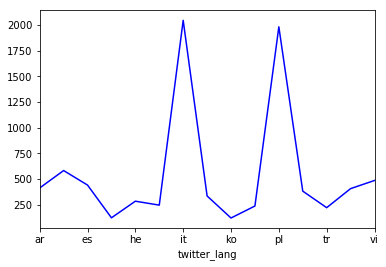

In [62]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lang_gb_mean['actor:friendsCount'].plot(kind='line', color='b')

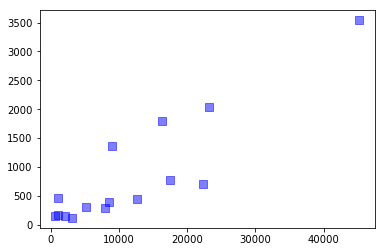

In [63]:
# more base matplotlib 
plt.scatter(x=lang_gb_mean['actor:statusesCount'],\
            y=lang_gb_mean['actor:followersCount'],\
            alpha=0.5,\
            s=50,\
            color='blue',\
            marker='s')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c49a17090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6c49337990>]], dtype=object)

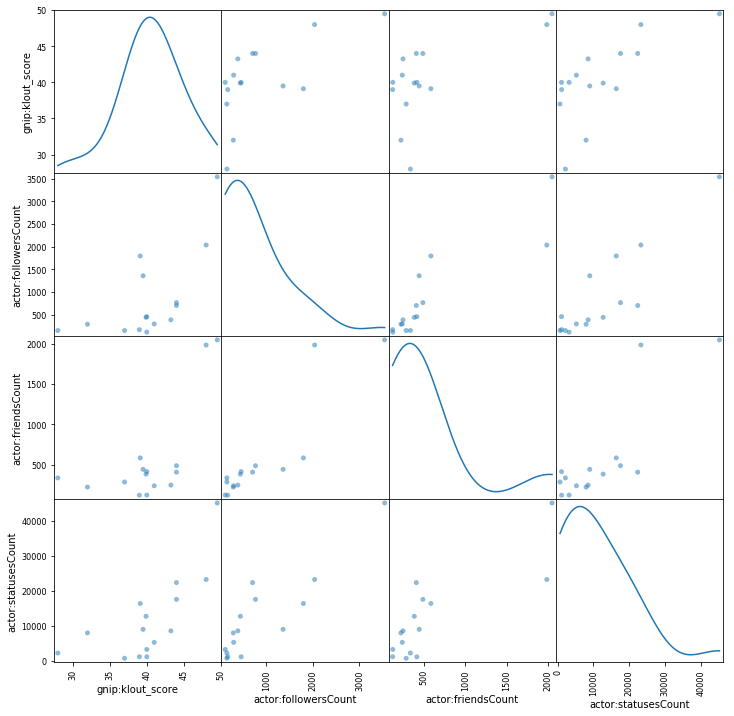

In [64]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(lang_gb_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)


Finally, a short taste of some other plotting libraries. My munging + plotting skillz in this world are still a work in progress, so I will definitely return to this section with an actual use-case in the future. For now, we'll make up some data for illustrative purposes.

In [65]:
# make up some data with large-scale patterns and a datetime index
df = pd.DataFrame(np.random.randn(2000, 5), index=pd.date_range('1/1/1990', periods=2000), columns=list('KLMNO'))
df = df.cumsum()
df.head()

,K,L,M,N,O
1990-01-01,-0.885485,-0.456173,-0.148692,0.079537,-0.959734
1990-01-02,-1.162555,-0.314553,-0.829708,-0.991291,-1.007169
1990-01-03,-1.434653,0.043347,-0.482543,0.058943,-0.516235
1990-01-04,-1.198095,0.482945,-1.506515,0.264312,-0.431872
1990-01-05,-2.038359,0.570855,-1.389643,1.702207,-1.499282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c405dc9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6c4037ad50>]], dtype=object)

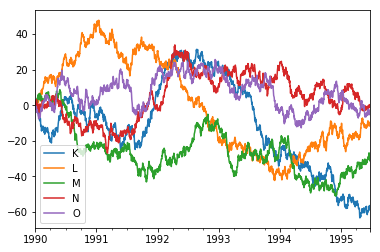

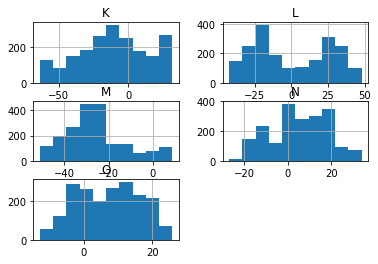

In [66]:
df.plot()
df.hist()

Now, let's use some other matplotlib wrappers to get a sense of how we can make this look a little better....

- `prettyplotlib` essentially just fixes a bunch of matplotlib settings behind the scenes so your base methods lead to e.g. ColorBrewer palettes. This essentially overwrites the .matplotlibrc settings for this session with palettes and settings that are slightly nicer. The settings will remain until you start a new session.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c3af17e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6c405e8f90>]], dtype=object)

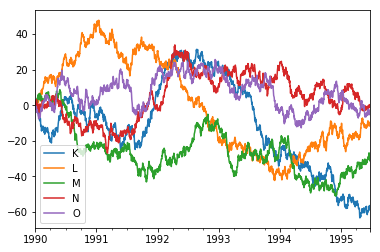

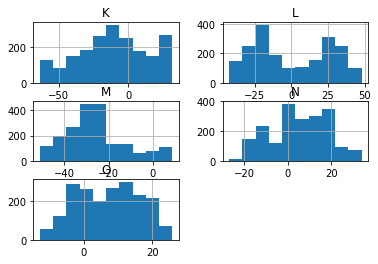

In [67]:
import prettyplotlib

df.plot()
df.hist()

# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the :ref:`categorical plots <categorical_tutorial>` chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [68]:
%matplotlib inline

In [69]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [70]:
import seaborn as sns
sns.set(color_codes=True)

In [71]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate distribution in seaborn is the ***`distplot` function. By default, this will draw a `histogram <https://en.wikipedia.org/wiki/Histogram>`_ and fit a `kernel density estimate <https://en.wikipedia.org/wiki/Kernel_density_estimation>`_ (KDE). 

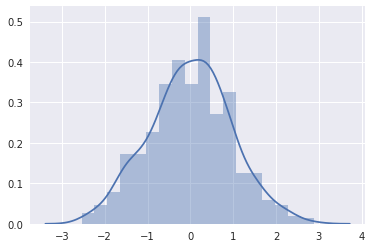

In [72]:
x = np.random.normal(size=500)
sns.distplot(x);

**Histograms**

Histograms are likely familiar, and a **``hist``** function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the **`rugplot`** function, but it is also available in **`distplot`**:

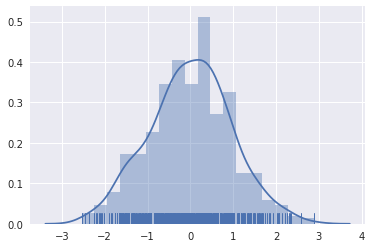

In [75]:
sns.distplot(x, kde=True, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. **`distplot`** uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

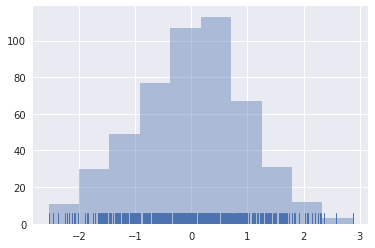

In [76]:
sns.distplot(x, bins=10, kde=False, rug=True);

**Kernel density estimaton**

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

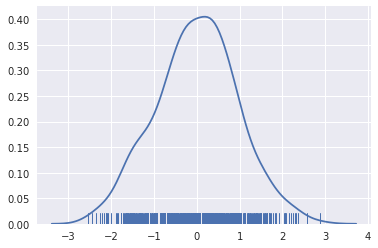

In [77]:
sns.distplot(x, hist=False, rug=True, kde=True);

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

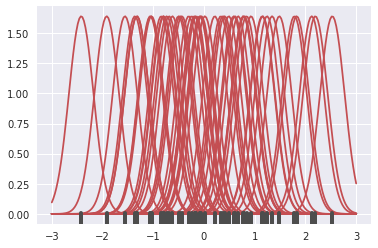

In [78]:
x = np.random.normal(0, 1, size=50)
bandwidth = 1.06 * x.std() * x.size ** (-2 / 5.)
support = np.linspace(-3, 3, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".3", linewidth=4);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

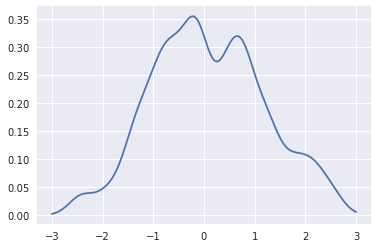

In [79]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

We can see that if we use the **`kdeplot`** function in seaborn, we get the same curve. This function is used by **`distplot`**, but it provides a more direct interface with easier access to other options when you just want the density estimate:

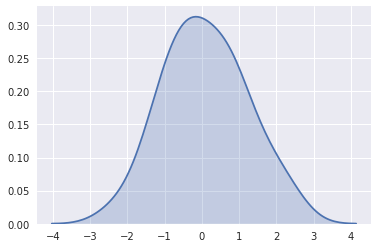

In [80]:
sns.kdeplot(x, shade=True);

The bandwidth (``bw``) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

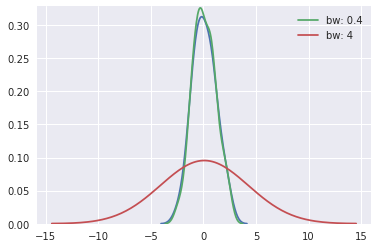

In [81]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.4, label="bw: 0.4")
sns.kdeplot(x, bw=4, label="bw: 4")
plt.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the ``cut`` parameter; however, this only influences how the curve is drawn and not how it is fit:

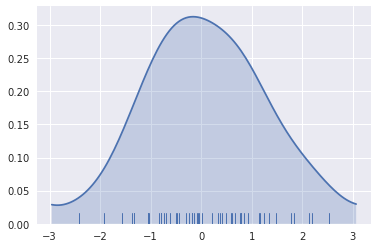

In [82]:
sns.kdeplot(x, shade=True, cut=1)
sns.rugplot(x);

**Fitting parametric distributions**


You can also use **`distplot`** to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

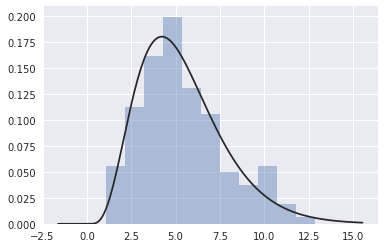

In [83]:
x = np.random.gamma(5, size=150)
sns.distplot(x, kde=False, fit=stats.gamma);

Plotting bivariate distributions
--------------------------------

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the ***`jointplot` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [84]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 300)
df = pd.DataFrame(data, columns=["a", "b"])

**Scatterplots**


The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the *x* and *y* values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib **``plt.scatter``** function, and it is also the default kind of plot shown by the **`jointplot`** function:

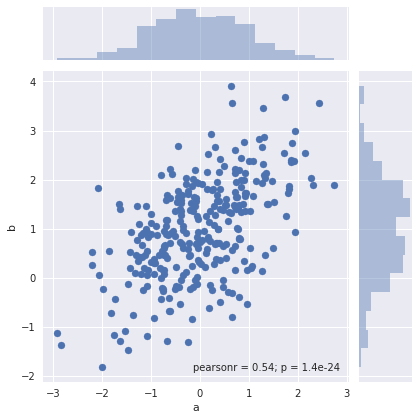

In [85]:
sns.jointplot(x="a", y="b", data=df);

**Hexbin plots**

The bivariate analogue of a histogram is known as a **"hexbin"** plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib **``plt.hexbin``** function and as a style in **`jointplot`**. It looks best with a white background:

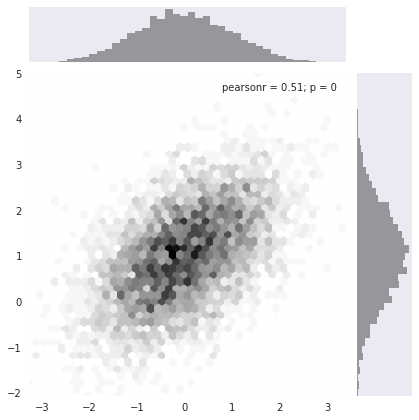

In [86]:
a, b = np.random.multivariate_normal(mean, cov, 5000).T
with sns.axes_style("dark"):
    sns.jointplot(x=a, y=b, kind="hex", color="k");

**Kernel density estimation**


It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in **`jointplot`**:

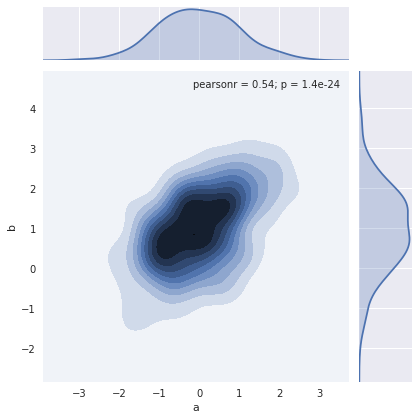

In [87]:
sns.jointplot(x="a", y="b", data=df, kind="kde");

You can also draw a two-dimensional kernel density plot with the **`kdeplot`** function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the **`jointplot`** function manages its own figure:

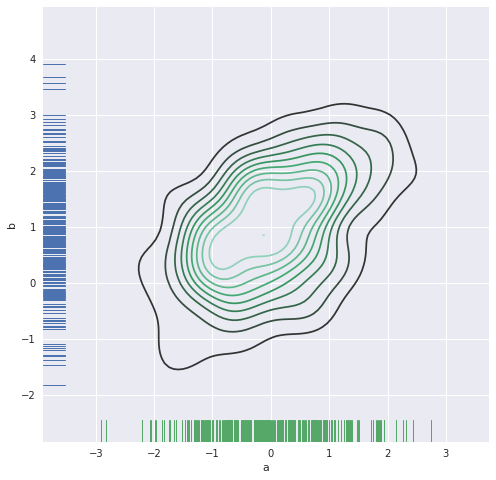

In [88]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot(df.a, df.b, ax=ax)
sns.rugplot(df.a, color="g", ax=ax)
sns.rugplot(df.b, vertical=True, ax=ax);

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

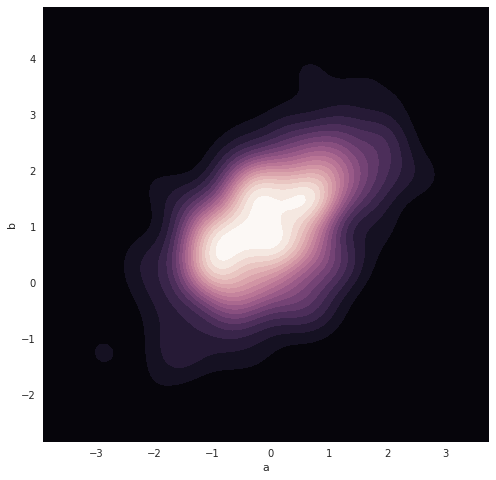

In [89]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.a, df.b, cmap=cmap, n_levels=20, shade=True);

The **`jointplot`** function uses a **`JointGrid`** to manage the figure. For more flexibility, you may want to draw your figure by using **`JointGrid`** directly. **`jointplot` returns the **`JointGrid`** object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

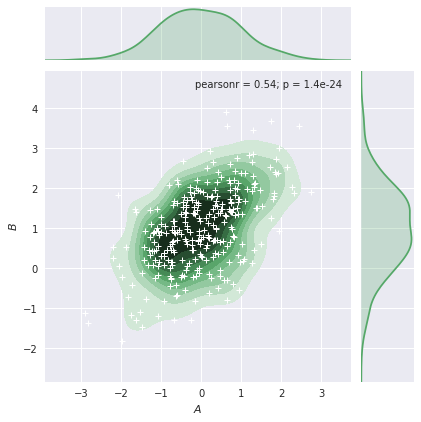

In [90]:
g = sns.jointplot(x="a", y="b", data=df, kind="kde", color="g")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$A$", "$B$");

Visualizing pairwise relationships in a dataset
-----------------------------------------------

To plot multiple pairwise bivariate distributions in a dataset, you can use the **`pairplot`** function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

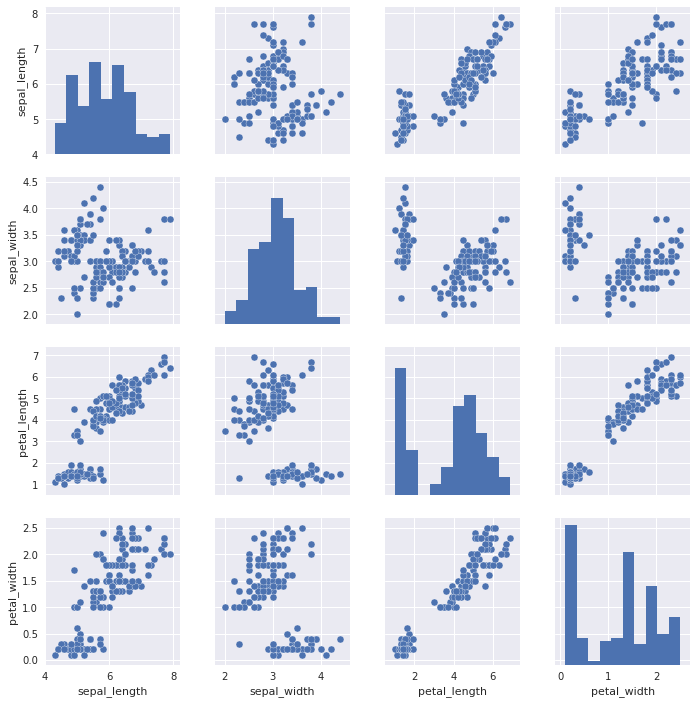

In [94]:
roy = sns.load_dataset("iris")
sns.pairplot(roy);

Much like the relationship between **`jointplot`** and **`JointGrid`**, the **`pairplot`** function is built on top of a **`PairGrid`** object, which can be used directly for more flexibility:

/bda/app/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


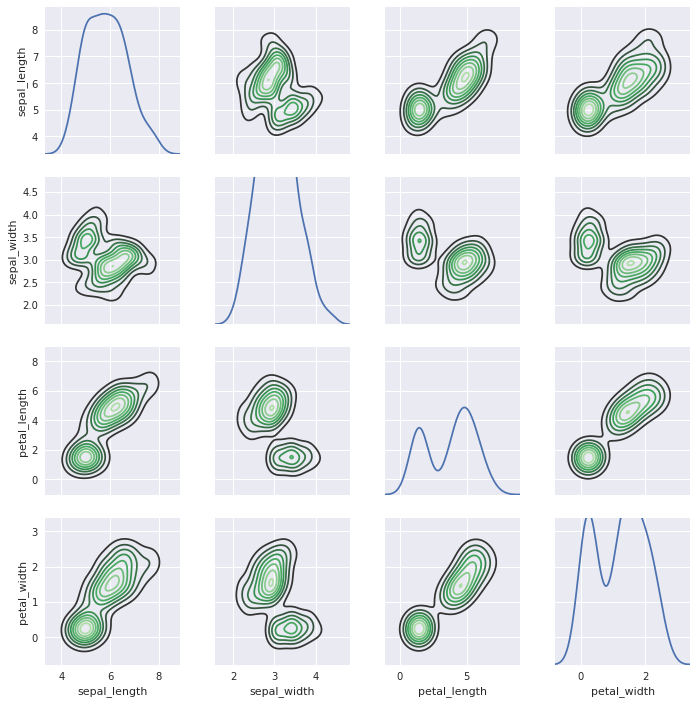

In [96]:
g = sns.PairGrid(roy)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Greens_d", n_levels=8);

# Visualizing linear relationships

In [97]:
%matplotlib inline

In [98]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [99]:
import seaborn as sns
sns.set(color_codes=True)

In [100]:
np.random.seed(sum(map(ord, "regression")))

In [101]:
tips = sns.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, **`regplot`** and **`lmplot`** are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

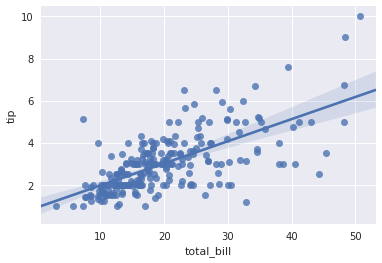

In [102]:
sns.regplot(x="total_bill", y="tip", data=tips);

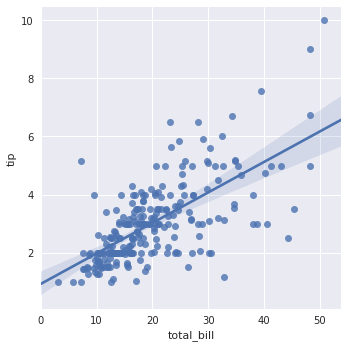

In [103]:
sns.lmplot(x="total_bill", y="tip", data=tips);

You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly. For now, the other main difference to know about is that **`regplot`** accepts the ``x`` and ``y`` variables in a variety of formats including simple numpy arrays, pandas ``Series`` objects, or as references to variables in a pandas ``DataFrame`` object passed to ``data``. In contrast, **`lmplot`** has ``data`` as a required parameter and the ``x`` and ``y`` variables must be specified as strings. This data format is called "long-form" or `"tidy" <http://vita.had.co.nz/papers/tidy-data.pdf>`_ data. Other than this input flexibility, **`regplot`** possesses a subset of **`lmplot`**'s features, so we will demonstrate them using the latter.

It's possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

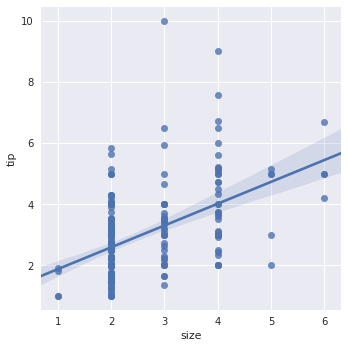

In [104]:
sns.lmplot(x="size", y="tip", data=tips);

One option is to add some random noise ("jitter") to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

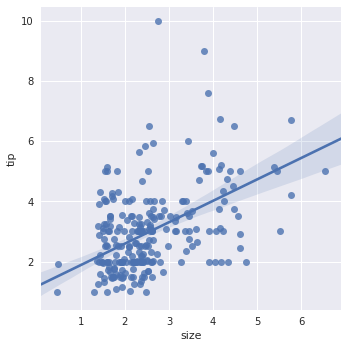

In [105]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.65);

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

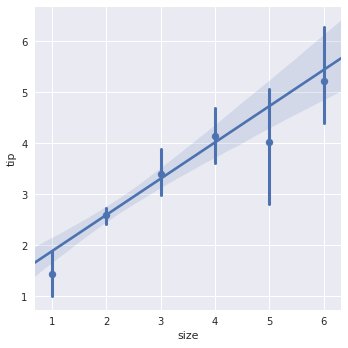

In [107]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

Fitting different kinds of models
---------------------------------

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The `Anscombe's quartet <https://en.wikipedia.org/wiki/Anscombe%27s_quartet>`_ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [109]:
quartet = sns.load_dataset("anscombe")

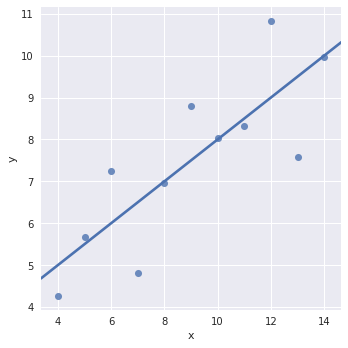

In [110]:
sns.lmplot(x="x", y="y", data=quartet.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 50});

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

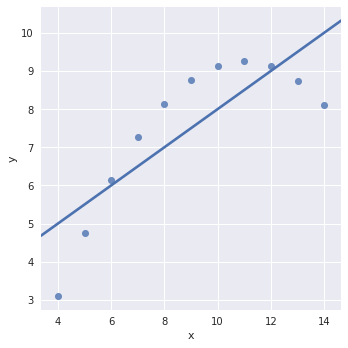

In [111]:
sns.lmplot(x="x", y="y", data=quartet.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 50});

In the presence of these kind of higher-order relationships, **`lmplot`** and **`regplot`** can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

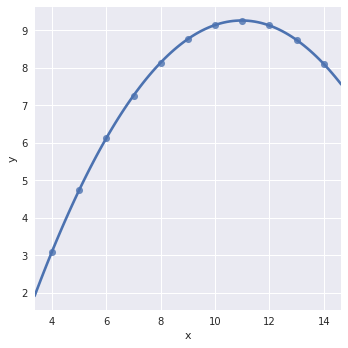

In [112]:
sns.lmplot(x="x", y="y", data=quartet.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 50});

A different problem is posed by "outlier" observations that deviate for some reason other than the main relationship under study:

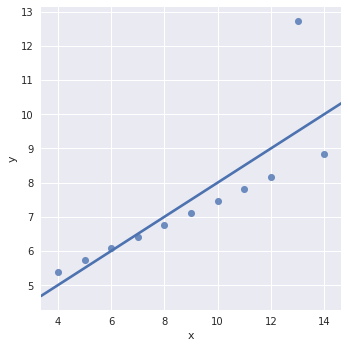

In [113]:
sns.lmplot(x="x", y="y", data=quartet.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 50});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

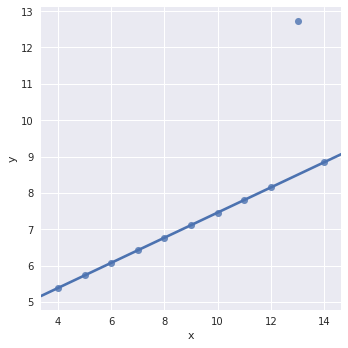

In [114]:
sns.lmplot(x="x", y="y", data=quartet.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 50});

When the ``y`` variable is binary, simple linear regression also "works" but provides implausible predictions:

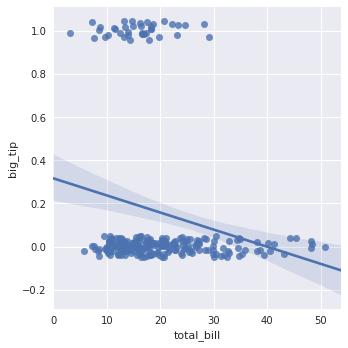

In [115]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .20
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.05);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of ``y = 1`` for a given value of ``x``:

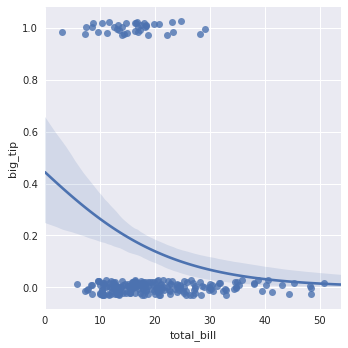

In [116]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ``ci=None``).

An altogether different approach is to fit a nonparametric regression using a `lowess smoother <https://en.wikipedia.org/wiki/Local_regression>`_. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

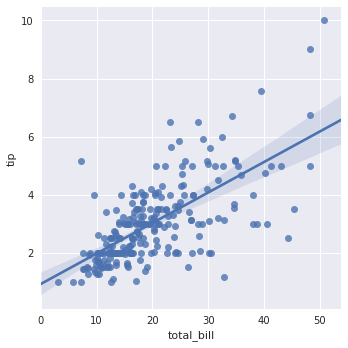

In [117]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=False);

The **`residplot`** function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around ``y = 0``:

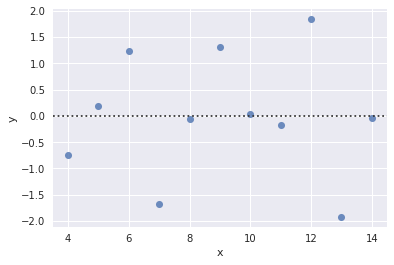

In [118]:
sns.residplot(x="x", y="y", data=quartet.query("dataset == 'I'"),
              scatter_kws={"s": 50});

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

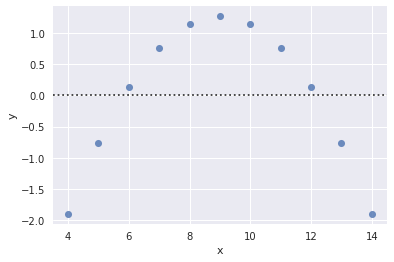

In [119]:
sns.residplot(x="x", y="y", data=quartet.query("dataset == 'II'"),
              scatter_kws={"s": 50});

Conditioning on other variables
-------------------------------

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the difference  between **`regplot`** and **`lmplot`** appears. While **`regplot`** always shows a single relationship, **`lmplot`** combines **`regplot`** with **`FacetGrid`** to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

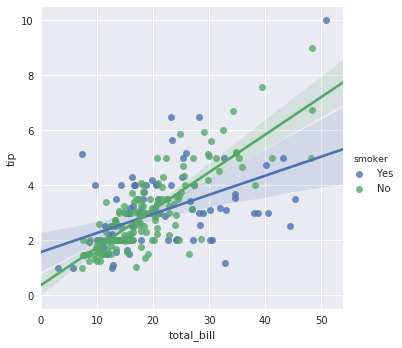

In [120]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In addition to color, it's possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

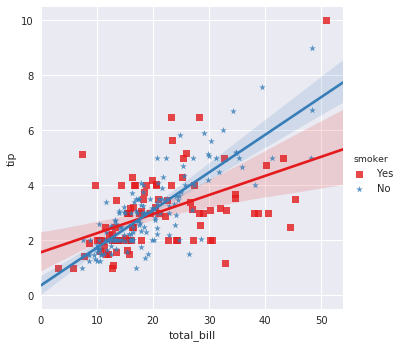

In [121]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["s", "*"], palette="Set1");

To add another variable, you can draw multiple "facets" which each level of the variable appearing in the rows or columns of the grid:

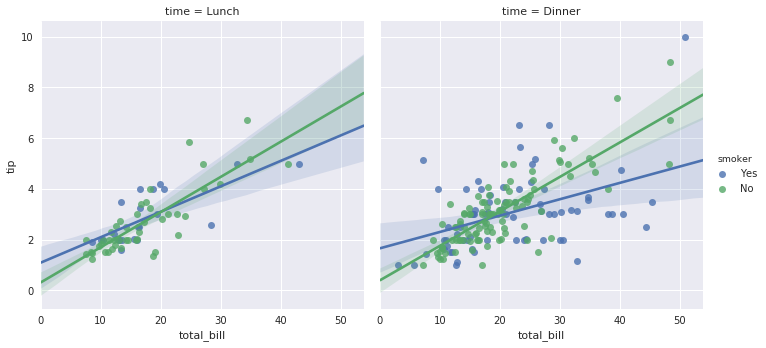

In [122]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

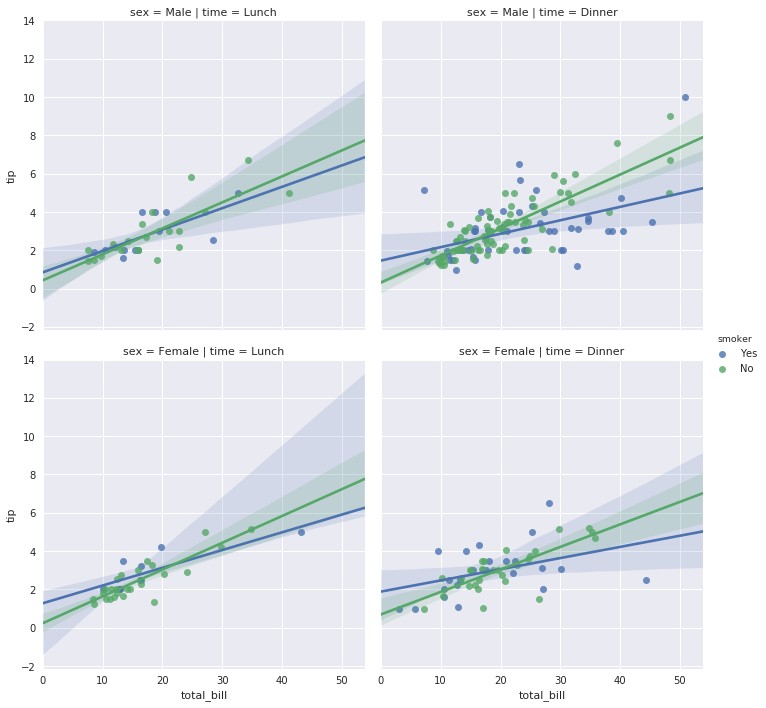

In [123]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

Controlling the size and shape of the plot
------------------------------------------

Before we noted that the default plots made by **`regplot`** and **`lmplot`** look the same but on axes that have a different size and shape. This is because **`regplot`** is an "axes-level" function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explictly provided, it simply uses the "currently active" axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

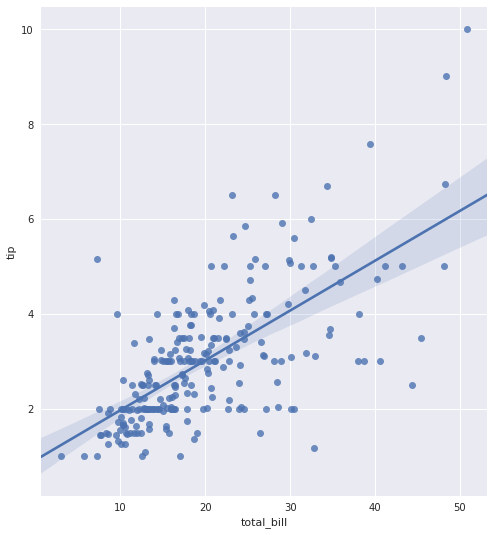

In [124]:
f, ax = plt.subplots(figsize=(8, 9))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

In contrast, the size and shape of the **`lmplot`** figure is controlled through the `FacetGrid` interface using the ``size`` and ``aspect`` parameters, which apply to each *facet* in the plot, not to the overall figure itself:

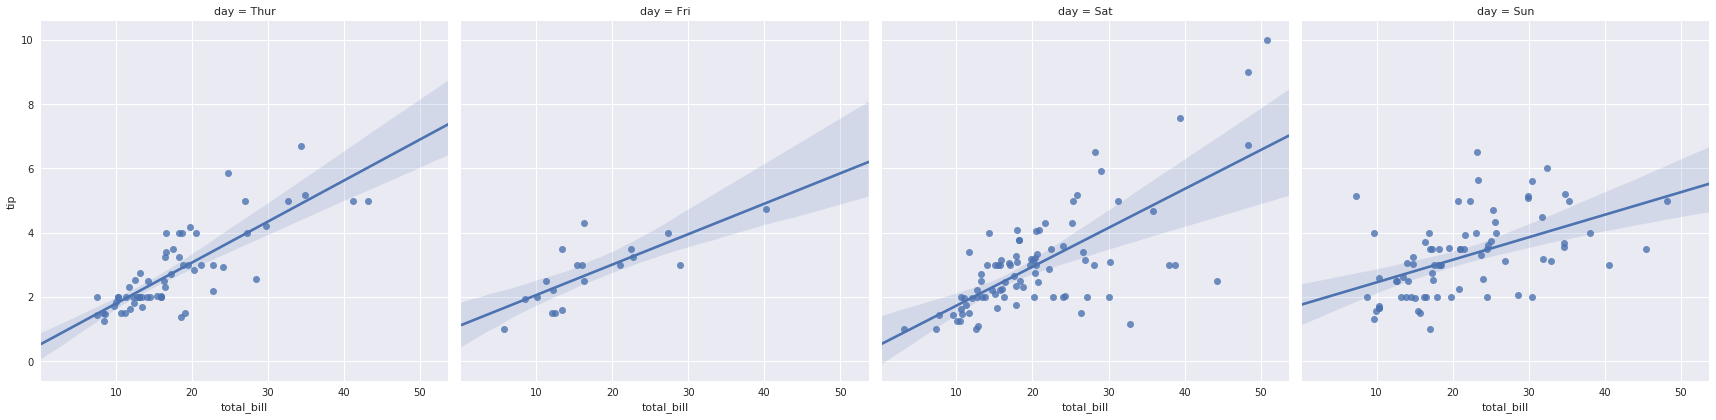

In [125]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=4, size=6);

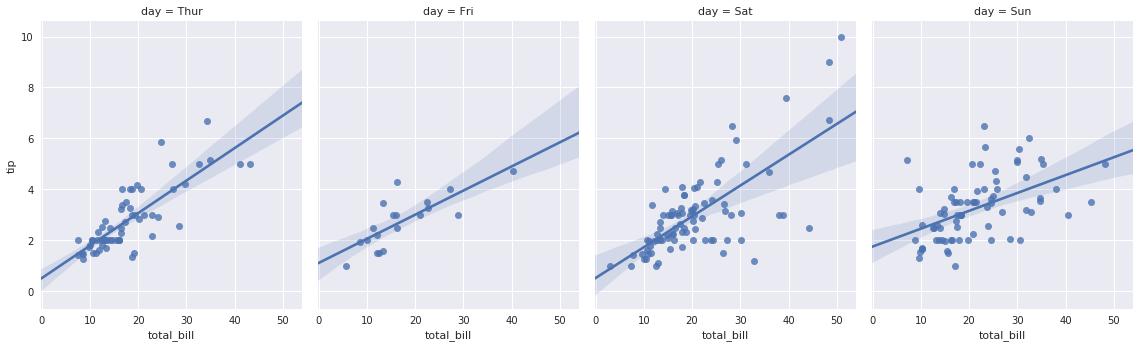

In [126]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.8);

Plotting a regression in other contexts
---------------------------------------

A few other seaborn functions use **`regplot`** in the context of a larger, more complex plot. The first is the **`jointplot`** function that we introduced in the :ref:`distributions tutorial <distribution_tutorial>`. In addition to the plot styles previously discussed, **`jointplot`** can use **`regplot`** to show the linear regression fit on the joint axes by passing ``kind="reg"``:

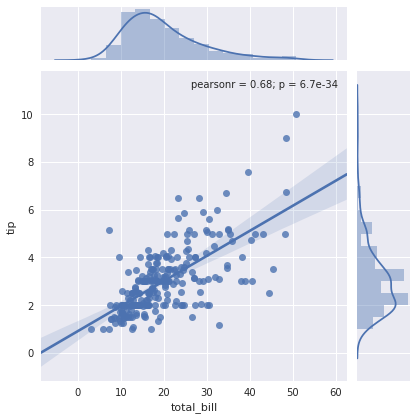

In [127]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

Using the **`pairplot`** function with ``kind="reg"`` combines **`regplot`** and **`PairGrid`** to show the linear relationship between variables in a dataset. Take care to note how this is different from **`lmplot`**. In the figure below, the two axes don't show the same relationship conditioned on two levels of a third variable; rather, **`PairGrid`** is used to show multiple relationships between different pairings of the variables in a dataset:

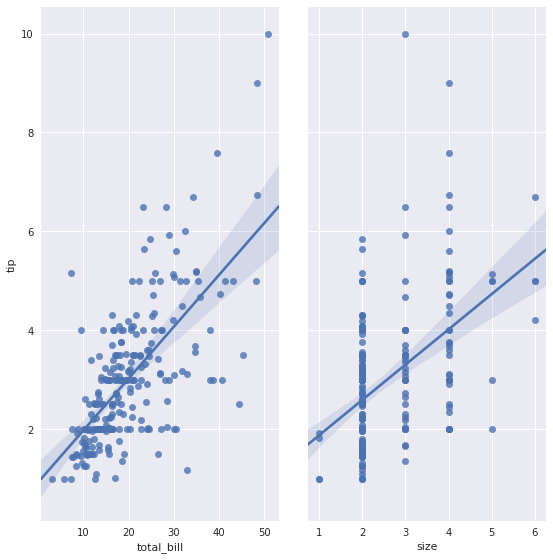

In [128]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=8, aspect=.5, kind="reg");

Like **`lmplot`**, but unlike **`jointplot`**, conditioning on an additional categorical variable is built into **`pairplot`** using the ``hue`` parameter:

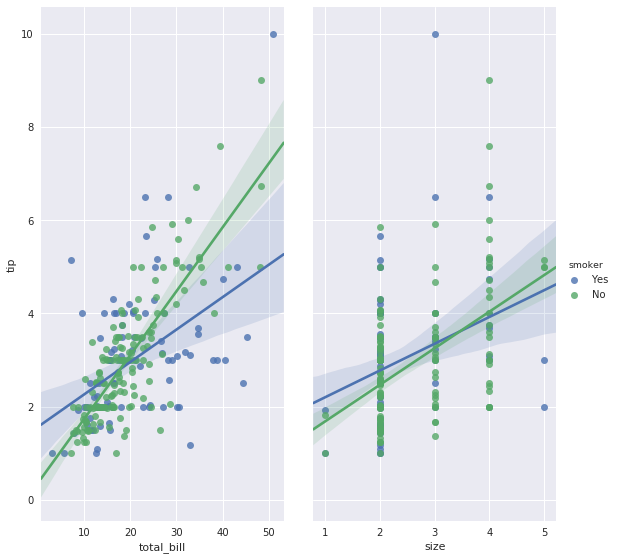

In [129]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=8, aspect=.5, kind="reg");

# Plotting with categorical data

We can use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each *distribution* of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions **swarmplot** and **stripplot**, the second includes **boxplot** and **violinplot**, and the third includes **barplot** and **pointplot**. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between **regplot** and **lmplot**, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level **factorplot**, which combines these functions with a **FacetGrid** to apply a categorical plot across a grid of figure panels.


In [130]:
%matplotlib inline

In [131]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [132]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [133]:
np.random.seed(sum(map(ord, "categorical")))

In [134]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Categorical scatterplots
------------------------

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses ***`stripplot`, which generalizes a scatterplot to the case where one of the variables is categorical:

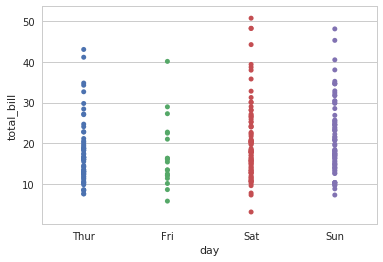

In [135]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random "jitter": 

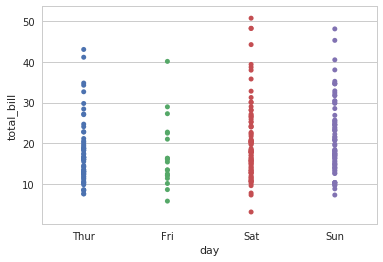

In [136]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False);

A different approach would be to use the function ***`swarmplot`, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

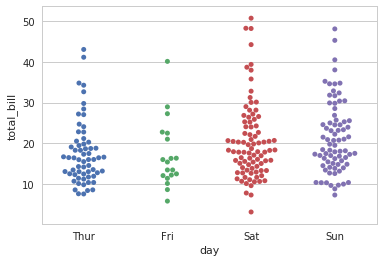

In [137]:
sns.swarmplot(x="day", y="total_bill", data=tips);

It's also possible to add a nested categorical variable with the ``hue`` parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

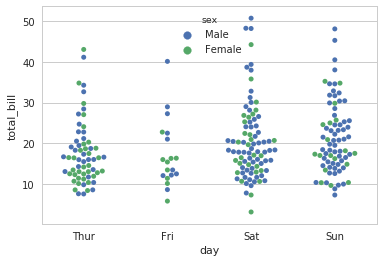

In [138]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas ``Categorical`` datatype, then the default order of the categories can be set there. For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame, but categories that look numerical will be sorted:

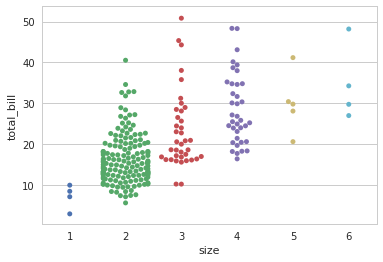

In [139]:
sns.swarmplot(x="size", y="total_bill", data=tips);

With these plots, it's often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). You can force an orientation using the ``orient`` keyword, but usually plot orientation can be inferred from the datatypes of the variables passed to ``x`` and/or ``y``:

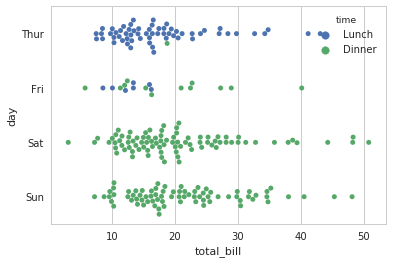

In [140]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

Distributions of observations within categories
-----------------------------------------------

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:`chapter <distribution_tutorial>` to the case where we want to quickly compare across several distributions.

Boxplots
^^^^^^^^

The first is the familiar ***`boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

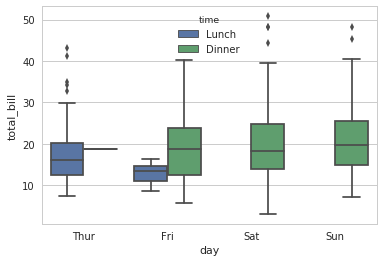

In [141]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

For boxplots, the assumption when using a ``hue`` variable is that it is nested within the ``x`` or ``y`` variable. This means that by default, the boxes for different levels of ``hue`` will be offset, as you can see above. If your ``hue`` variable is not nested, you can set the ``dodge`` parameter to disable offsetting:

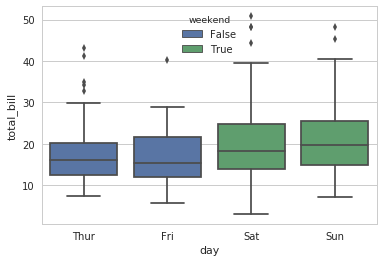

In [142]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

Violinplots
^^^^^^^^^^^

A different approach is a ***`violinplot`, which combines a boxplot with the kernel density estimation procedure described in the :ref:`distributions <distribution_tutorial>` tutorial:

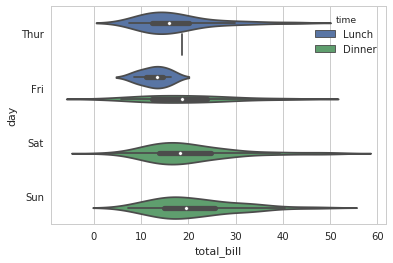

In [143]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

This approach uses the kernel density estimate to provide a better description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

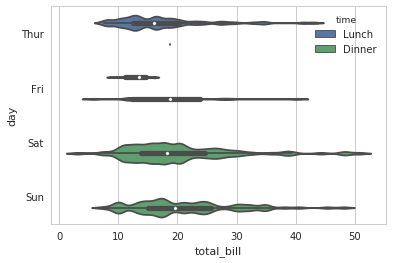

In [144]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

It's also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

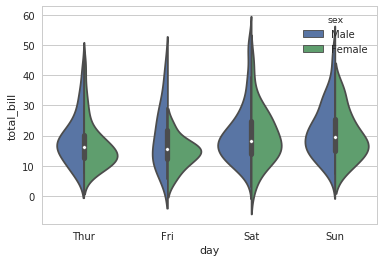

In [145]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

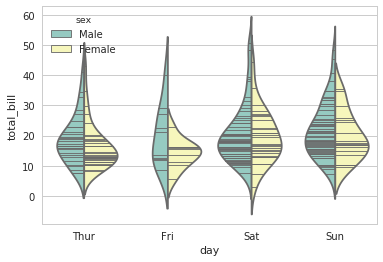

In [146]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

It can also be useful to combine ***`swarmplot` or ***`swarmplot` with ***`violinplot` or ***`boxplot` to show each observation along with a summary of the distribution:

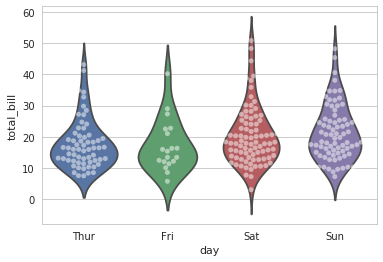

In [147]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

Statistical estimation within categories
----------------------------------------

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

Bar plots
----------

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the ***`barplot`*** function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

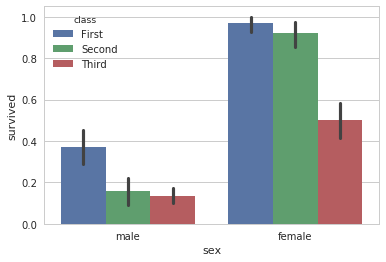

In [148]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the ***`countplot` function:

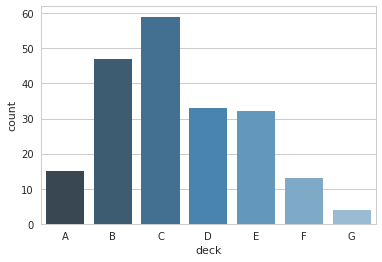

In [149]:
sns.countplot(x="deck", data=titanic, palette="Blues_d");

Both ***`barplot`*** and ***`countplot`*** can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

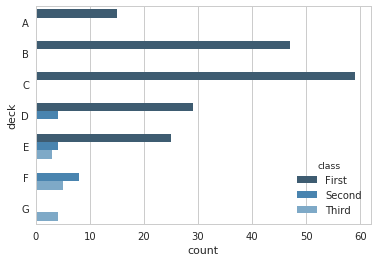

In [150]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Blues_d");

Point plots
------------

An alternative style for visualizing the same information is offered by the ***`pointplot`*** function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same ``hue`` category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

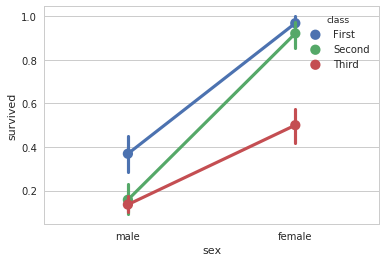

In [151]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the ``hue`` category:

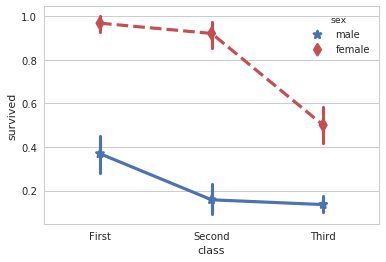

In [152]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "b", "female": "r"},
              markers=["*", "d"], linestyles=["-", "--"]);

Plotting "wide-form" data
-------------------------

While using "long-form" or "tidy" data is preferred, these functions can also by applied to "wide-form" data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the ``data`` parameter:

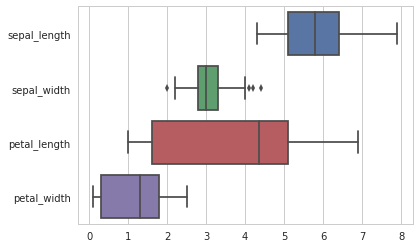

In [162]:
sns.boxplot(data=iris, orient="h");

Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a ``DataFrame``:

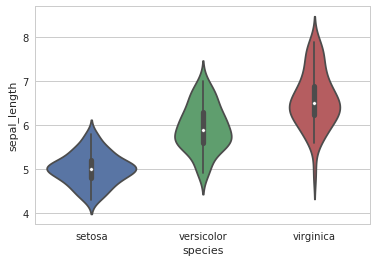

In [154]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots:

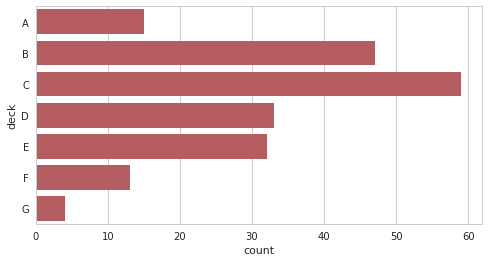

In [155]:
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(y="deck", data=titanic, color="r");

Drawing multi-panel categorical plots
-------------------------------------

As we mentioned above, there are two ways to draw categorical plots in seaborn. Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function ***`factorplot`***, which combines these functions with a ***`FacetGrid`*** to add the ability to examine additional categories through the larger structure of the figure. By default, ***`factorplot`*** produces a ***`pointplot`***:

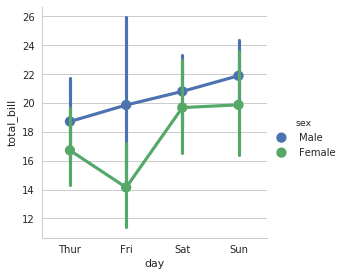

In [156]:
sns.factorplot(x="day", y="total_bill", hue="sex", data=tips);

However, the ``kind`` parameter lets you chose any of the kinds of plots discussed above:

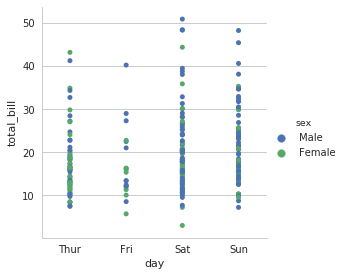

In [157]:
sns.factorplot(x="day", y="total_bill", hue="sex", data=tips, kind="strip");

The main advantage of using a ***`factorplot`*** is that it is very easy to "facet" the plot and investigate the role of other categorical variables:

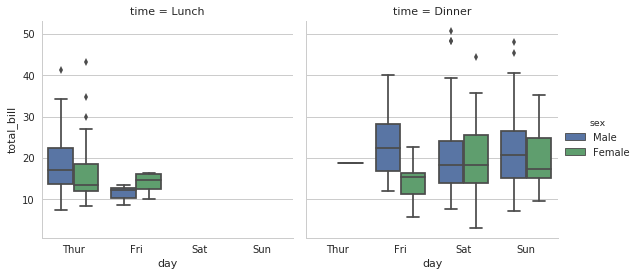

In [161]:
sns.factorplot(x="day", y="total_bill", hue="sex",
               col="time", data=tips, kind="box");

Any kind of plot can be drawn. Because of the way :class:`FacetGrid` works, to change the size and shape of the figure you need to specify the ``size`` and ``aspect`` arguments, which apply to each facet:

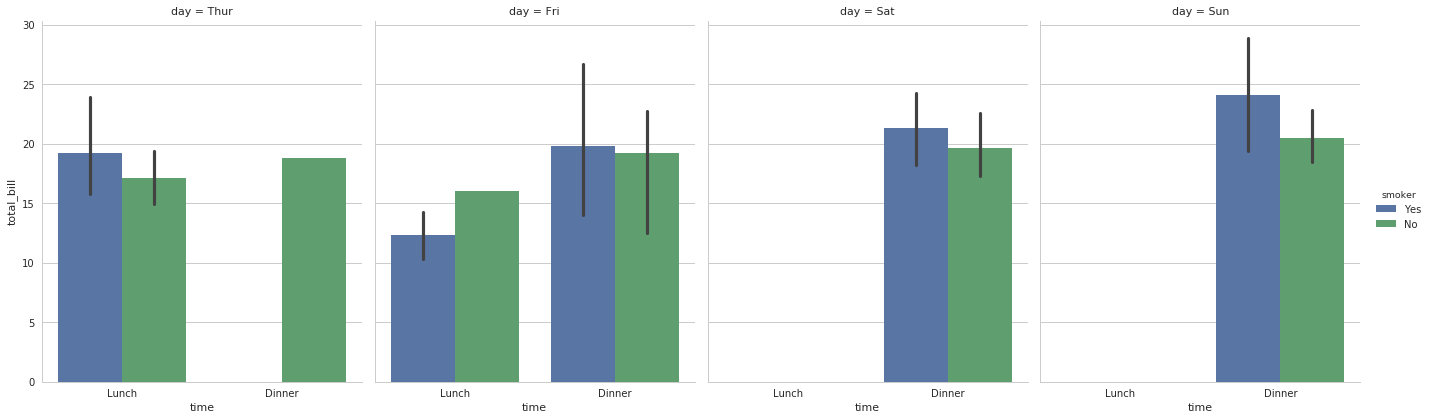

In [159]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="bar", size=6, aspect=.8);

It is important to note that you could also make this plot by using ***`boxplot`*** and :class:`FacetGrid` directly. However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a ``Categorical`` datatype or by passing ``order`` and ``hue_order``.

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a :class:`PairGrid` to show categorical relationships across several different variables:

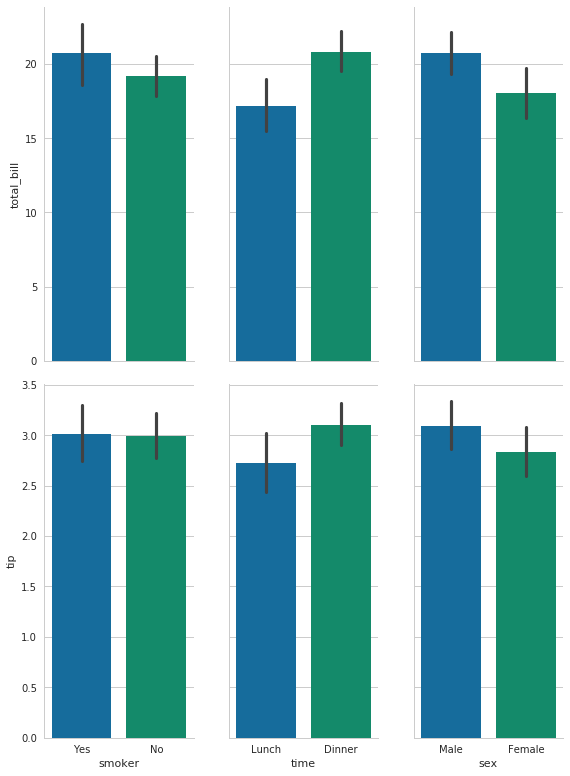

In [160]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.5, size=5.5)
g.map(sns.barplot, palette="colorblind");